Implement the SGD Method using Delta learning rule for following input-target 
sets. 𝑿𝑰𝒏𝒑𝒖𝒕 = [ 0 0 1; 0 1 1;1 0 1; 1 1 1], 𝑫𝑻𝒂𝒓𝒈𝒆𝒕 = [ 0; 0; 1; 1].

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Xinput = np.array([[0, 0, 1],  
                   [0, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

# Target output (binary classification)
Dtarget = np.array([0, 0, 1, 1])

In [6]:
weights = np.random.randn(3)
learning_rate = 0.1
epochs = 100

In [8]:
def step_function(x):
    """Step activation function for binary classification"""
    return np.where(x >= 0, 1, 0)

In [10]:
convergence_curve = []
converged = False
for epoch in range(epochs):
    total_error = 0
    
    # Shuffle the data for each epoch (stochastic gradient descent)
    indices = np.random.permutation(len(Xinput))
    Xinput_shuffled = Xinput[indices]
    Dtarget_shuffled = Dtarget[indices]
    
    for i in range(len(Xinput)):
        x = Xinput_shuffled[i]
        d = Dtarget_shuffled[i]
        
        # Forward pass (calculate output)
        y = step_function(np.dot(x, weights))
        
        # Calculate error
        error = d - y
        total_error += abs(error)
         # Delta rule: weight update
        weights += learning_rate * error * x
    
    convergence_curve.append(total_error)
    
    # Stop early if there is no error
    if total_error == 0 and not converged:
        print(f"Converged in {epoch + 1} epochs.")
        converged = True

Converged in 8 epochs.


In [12]:
print("Final weights:", weights)

Final weights: [ 0.10646055  0.02518162 -0.10108395]


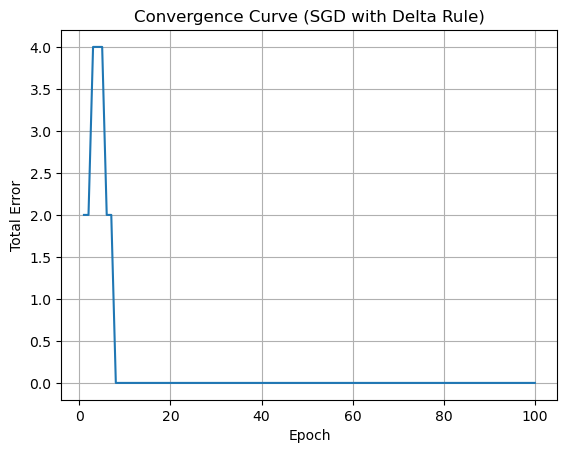

In [14]:
plt.plot(range(1, len(convergence_curve) + 1), convergence_curve)
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Convergence Curve (SGD with Delta Rule)')
plt.grid()
plt.show()